###Group 20
**Anurag Pandey** and
 **Kuldeep Semwal**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# New Section

In [ ]:
!pip install tensorflow

In [3]:
pip install tensorflow-io

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf 
import tensorflow_io as tfio

Building a Data Loading Function

In [5]:
cat_file = os.path.join('gdrive', 'MyDrive', 'speech_project', 'cats','cat_3.wav')
dog_file = os.path.join('gdrive', 'MyDrive', 'speech_project', 'dogs', 'dog_barking_0.wav')

In [6]:
print(cat_file)
print(dog_file)

gdrive/MyDrive/speech_project/cats/cat_3.wav
gdrive/MyDrive/speech_project/dogs/dog_barking_0.wav


Building a function to load data from tensorflow documentation: and check each step of the function


In [7]:
def load_wav_16k_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels) 
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000hz - amplitude of the audio signal
    wav = tfio.audio.resample(wav, rate_in=44100, rate_out=16000)
    return wav

In [8]:
wave_cat = load_wav_16k_mono(cat_file)
wave_dog = load_wav_16k_mono(dog_file)

In [ ]:
file_contents = tf.io.read_file(cat_file)
#this will give us the string of the cat_file.
file_contents

In [10]:
 wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
 wav

<tf.Tensor: shape=(187200, 1), dtype=float32, numpy=
array([[2.3864746e-02],
       [2.4108887e-02],
       [2.2766113e-02],
       ...,
       [3.6926270e-03],
       [2.2277832e-03],
       [3.0517578e-05]], dtype=float32)>

In [11]:
sample_rate

<tf.Tensor: shape=(), dtype=int32, numpy=16000>

In [12]:
len(wav)

187200

In [13]:
wav = tfio.audio.resample(wav, rate_in=44100, rate_out=16000)
len(wav)

67918

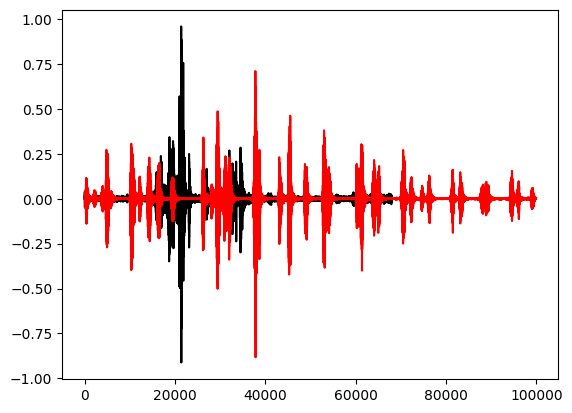

In [98]:
plt.plot(wave_cat,color='black')
plt.plot(wave_dog, color='red')
plt.show()

Definning path for dogs and cats file
to create a tensorflow dataset

In [15]:
cat_path = os.path.join('gdrive', 'MyDrive', 'speech_project', 'cats')
dog_path = os.path.join('gdrive', 'MyDrive', 'speech_project', 'dogs')

In [16]:
# import os
# cat_path = '/content/gdrive/MyDrive/speech_project/cats'
# print(os.listdir(cat_path))

Creating a tensorflow dataset


In [17]:
cat_pos = tf.data.Dataset.list_files(cat_path+'/*.wav')
dog_neg = tf.data.Dataset.list_files(dog_path+'/*.wav')

In [18]:
print(len(cat_pos))
print(len(dog_neg))

168
115


In [19]:
tf.zeros(len(dog_neg))
# here we can see that all the files available in cat_pos file has got mapped to zero

<tf.Tensor: shape=(115,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [20]:
tf.ones(len(cat_pos))
# here we can see that all the files available in cat_pos file has got mapped to one

<tf.Tensor: shape=(168,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
      dtype=float32)>

In [21]:
positives_for_cats = tf.data.Dataset.zip((cat_pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(cat_pos)))))
negatives_for_dogs = tf.data.Dataset.zip((dog_neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(dog_neg)))))
data = positives_for_cats.concatenate(negatives_for_dogs)

In [22]:
len(data)

283

In [23]:
data.shuffle(1000).as_numpy_iterator().next()

(b'gdrive/MyDrive/speech_project/dogs/dog_barking_76.wav', 0.0)

In [24]:
positives_for_cats.as_numpy_iterator().next()

(b'gdrive/MyDrive/speech_project/cats/cat_125.wav', 1.0)

In [25]:
negatives_for_dogs.as_numpy_iterator().next()

(b'gdrive/MyDrive/speech_project/dogs/dog_barking_45.wav', 0.0)

we need to calculate full call of cats to calculate mean, min and max calls

In [26]:
lengths_cat = []
for file in os.listdir(os.path.join('gdrive', 'MyDrive', 'speech_project', 'cats')):
    tensor_wave = load_wav_16k_mono(os.path.join('gdrive', 'MyDrive', 'speech_project', 'cats', file))
    lengths_cat.append(len(tensor_wave))

In [ ]:
lengths_cat

Calculate Mean, Min and Max

In [28]:
tf.math.reduce_mean(lengths_cat)

<tf.Tensor: shape=(), dtype=int32, numpy=48894>

In [29]:
#so we can see that that the average time of cat call is mean/16000 seconds
avg_cat_time = 48894/16000
avg_cat_time

3.055875

In [30]:
tf.math.reduce_min(lengths_cat)

<tf.Tensor: shape=(), dtype=int32, numpy=5359>

In [31]:
#here we can see the minimum time of cat call is min/16000 sec
cat_time_min = 5359/16000
cat_time_min

0.3349375

In [32]:
tf.math.reduce_max(lengths_cat)

<tf.Tensor: shape=(), dtype=int32, numpy=381178>

In [33]:
# here we can see the max time of cat call is max/16000 sec
cat_time_max = 381178/16000
cat_time_max

23.823625

we need to calculate full call of dogs to calculate mean, min and max calls

In [34]:
# import os

# def load_wav_16k_mono(filename):
#     """Load a WAV file, convert it to mono and resample it to 16 kHz."""
#     file_contents = tf.io.read_file(filename)
#     wav_decoder = tf.audio.decode_wav(
#         file_contents,
#         desired_channels=1,
#         desired_samples=16000)
#     return wav_decoder.audio.numpy().flatten()

# lengths_dog = []
# for file in os.listdir(os.path.join('gdrive', 'MyDrive', 'speech_project', 'dogs')):
#     try:
#         tensor_wave = load_wav_16k_mono(os.path.join('gdrive', 'MyDrive', 'speech_project', 'dogs', file))
#         lengths_dog.append(len(tensor_wave))
#     except tf.errors.InvalidArgumentError as e:
#         if 'Bad format chunk size for WAV' in str(e):
#             print(f"Skipping file {file} due to bad format chunk size.")
#         else:
#             raise e



In [35]:
lengths_dog = []
for file in os.listdir(os.path.join('gdrive', 'MyDrive', 'speech_project', 'dogs')):
    tensor_wave = load_wav_16k_mono(os.path.join('gdrive', 'MyDrive', 'speech_project', 'dogs', file))
    lengths_dog.append(len(tensor_wave))

Calculate Mean, Min and Max

In [36]:
tf.math.reduce_mean(lengths_dog)

<tf.Tensor: shape=(), dtype=int32, numpy=34688>

In [37]:
#since mean no. of cycles 34688 and cycles per second is 16000 therefore average time of dog call will be 34688/16000 sec.
avg_dog_time = 34688/16000
avg_dog_time

2.168

In [38]:
tf.math.reduce_min(lengths_dog)

<tf.Tensor: shape=(), dtype=int32, numpy=5896>

In [39]:
# min dog call time will be 5896/16000 sec
dog_time_min = 5896/16000
dog_time_min

0.3685

In [40]:
tf.math.reduce_max(lengths_dog)

<tf.Tensor: shape=(), dtype=int32, numpy=476891>

In [41]:
#max time for dog call will be 476891/16000 sec
dog_time_max = 476891/16000
dog_time_max

29.8056875

Build Preprocessing Function to Convert to Spectrogram

we will be using short time furior transform to convert into spectrogram

In [42]:
def spectr_funct(file_path, label): # we need both file path and label because we will parsing through data which file path and label

    # this will use previously defined function
    wav = load_wav_16k_mono(file_path)
    # we will be using first 32000 steps of each signals.
    wav = wav[:32000] 
    # since not all the signals will have 32000 steps so we are adding zero padding.
    zero_padding = tf.zeros([32000] - tf.shape(wav), dtype=tf.float32) 
    # we will be concatennating zero padding to our wave file
    wav = tf.concat([zero_padding, wav],0) 
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    #we will be using absolute function to remove any negative value
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

Test Out the Function and Viz the Spectrogram

In [43]:
filepath, label = positives_for_cats.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [44]:
spectrogram, label = spectr_funct(filepath, label)

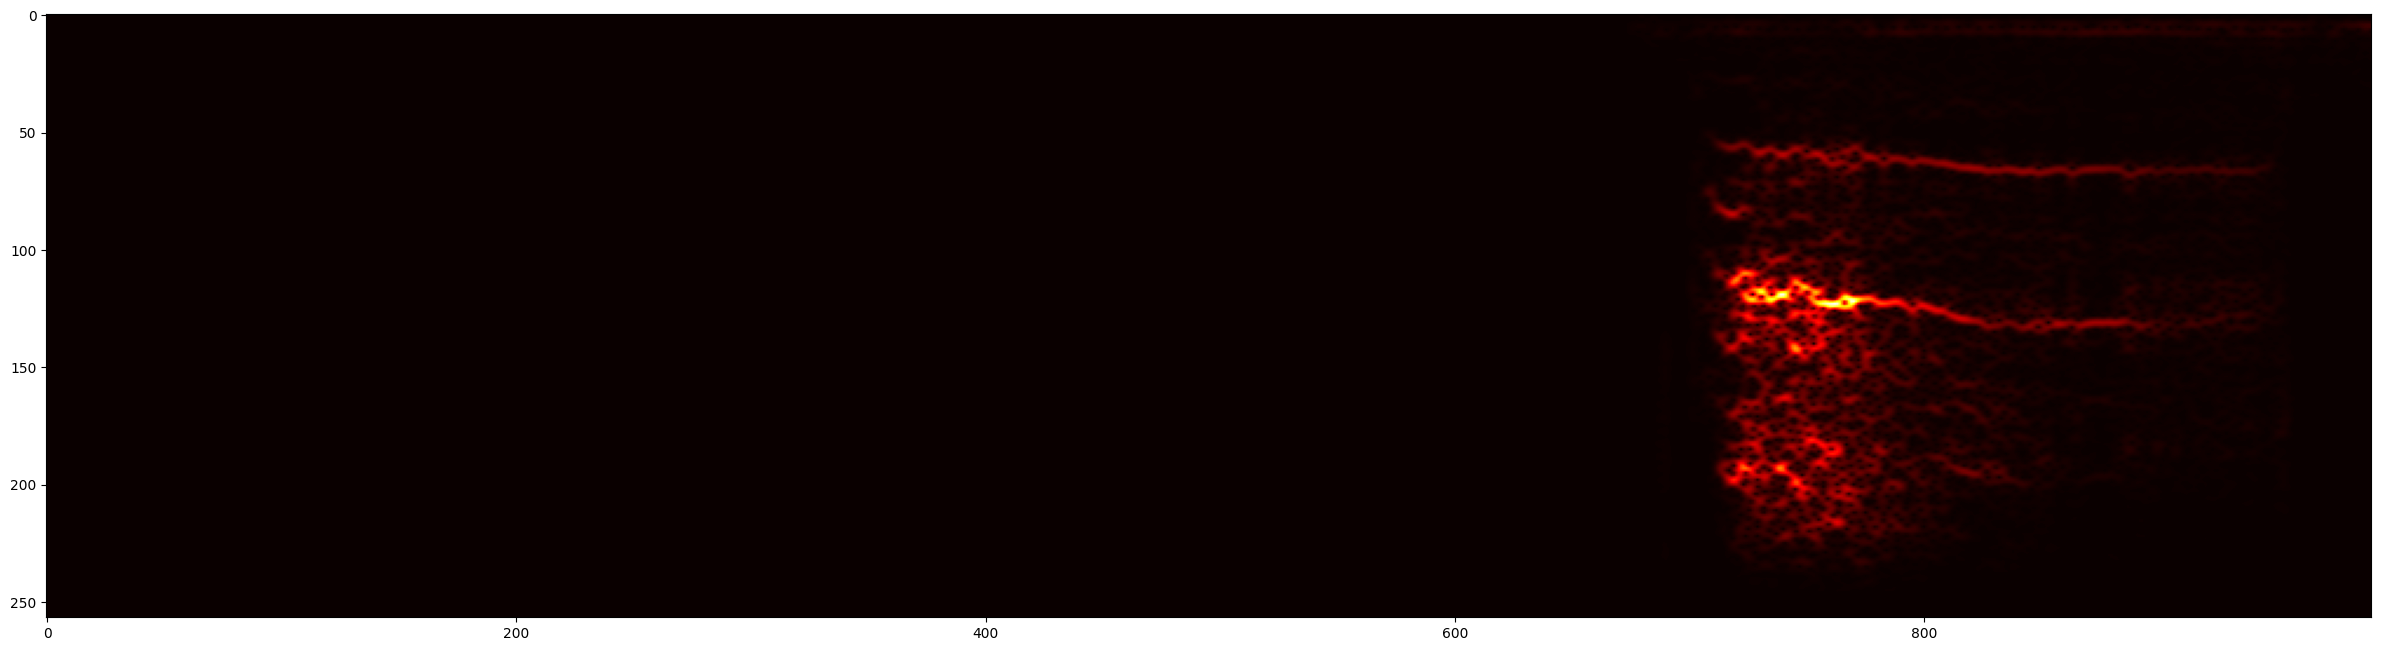

In [45]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0], 'hot')
plt.show()# for cat sounds

In [46]:
filepath, label = negatives_for_dogs.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [47]:
spectrogram, label = spectr_funct(filepath, label)

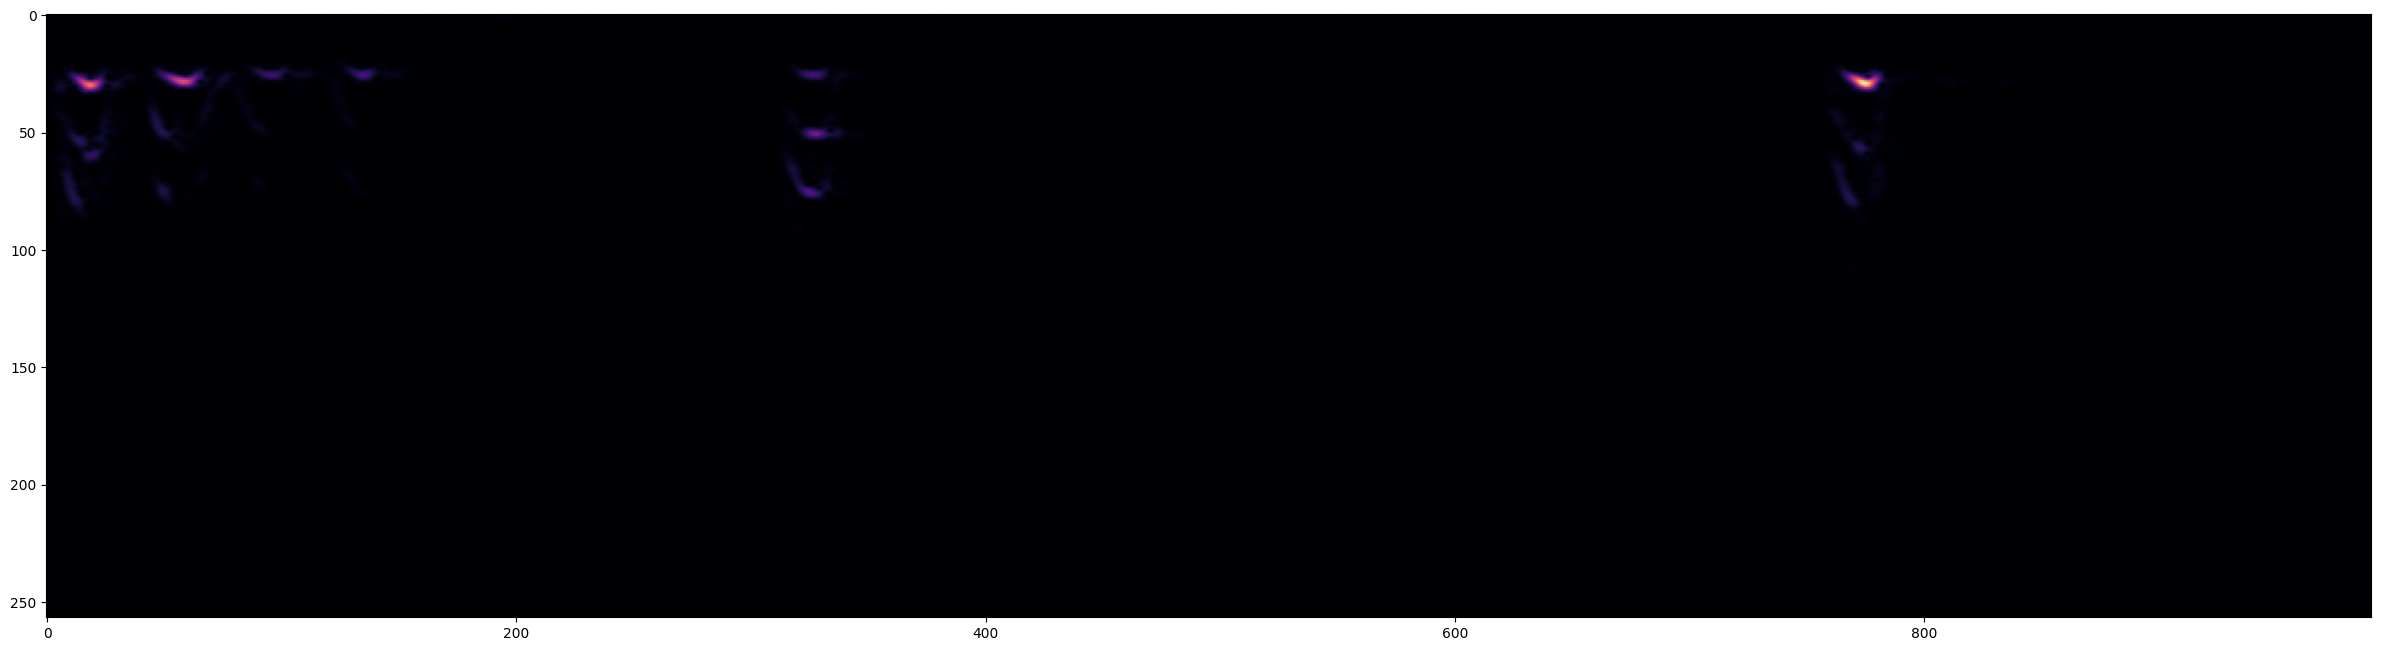

In [48]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0], cmap='magma')
plt.show()# for dog sounds

Create Training and Testing Partitions

Create a Tensorflow Data Pipeline

In [49]:
data = data.map(spectr_funct)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(16)
data = data.prefetch(8)

Split into Training and Testing Partitions

In [50]:
from sklearn.model_selection import train_test_split


In [51]:
train = data.take(100)
test = data.skip(10).take(20)

Test One Batch

In [52]:
samples, labels = next(iter(train))

In [53]:
samples.shape

TensorShape([16, 991, 257, 1])

In [54]:
print (len(samples))

16


Build Deep Learning Model

Load Tensorflow Dependencies

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten

In [56]:
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout

Build Sequential Model, Compile and View Summary

In [57]:
# model = Sequential()
# model.add(Conv2D(32, (1,1), activation='relu', input_shape=(1491, 257,1)))
# model.add(Conv2D(32, (1,1), activation='relu'))
# model.add(Flatten())
# model.add(Dense(100, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# # model = Sequential([
# #     Conv2D(32, (3,3), activation='relu', input_shape=(1491,257,1)),
# #     MaxPooling2D((2,2)),
# #     Flatten(),
# #     Dense(128, activation='relu'),
# #     Dense(1, activation='sigmoid')

# model = Sequential()
# model.add(Conv2D(16, (1,1), activation='relu', input_shape=(1491, 257,1)))
# model.add(Flatten())
# model.add(Dense(50, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

model = Sequential()
model.add(Conv2D(16, (1, 1), activation='relu', input_shape=(991, 257, 1)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [58]:
# model.compile(optimizer='adamax',
#               metrics=['accuracy'],
#               loss='binary_crossentropy')
precision = tf.keras.metrics.Precision(name='precision')
recall = tf.keras.metrics.Recall(name='recall')

model.compile(optimizer='adamax',
              metrics=['accuracy', precision, recall],
              loss='binary_crossentropy')

In [59]:
class Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') >= 0.9:
            self.model.stop_training = True

Fit Model, View Loss and KPI Plots

In [60]:
history = model.fit(train,
                    epochs=8,
                    validation_data=test,
                    batch_size=32,  # increased batch size
                    steps_per_epoch=210//64, 
                    validation_steps=63//28, 
                    callbacks=[Callback()])

Epoch 1/8
3/3 [==============================] - 10s 3s/step - loss: 20.5503 - accuracy: 0.7083 - precision: 0.7586 - recall: 0.7586 - val_loss: 14.5633 - val_accuracy: 0.8750 - val_precision: 0.8750 - val_recall: 0.8750
Epoch 2/8
3/3 [==============================] - 9s 4s/step - loss: 38.3171 - accuracy: 0.7500 - precision: 0.8182 - recall: 0.6923 - val_loss: 2.7974 - val_accuracy: 0.9062 - val_precision: 0.8750 - val_recall: 0.9333
Epoch 3/8
3/3 [==============================] - 8s 3s/step - loss: 24.2059 - accuracy: 0.7292 - precision: 0.7407 - recall: 0.7692 - val_loss: 15.7562 - val_accuracy: 0.8438 - val_precision: 0.7727 - val_recall: 1.0000
Epoch 4/8
3/3 [==============================] - 9s 3s/step - loss: 25.4752 - accuracy: 0.7708 - precision: 0.8108 - recall: 0.8824 - val_loss: 5.1108 - val_accuracy: 0.8750 - val_precision: 0.9333 - val_recall: 0.8235
Epoch 5/8
3/3 [==============================] - 9s 3s/step - loss: 16.3172 - accuracy: 0.7917 - precision: 0.8077 - reca

3/3 [==============================] - 2s 612ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 2.6985 - val_accuracy: 0.9062 - val_precision: 1.0000 - val_recall: 0.7692


In [61]:
hist = model.fit(train, epochs=3, validation_data=test)

Epoch 1/3
18/18 [==============================] - 49s 3s/step - loss: 3.8287 - accuracy: 0.9329 - precision: 0.9306 - recall: 0.9583 - val_loss: 0.6537 - val_accuracy: 0.9512 - val_precision: 0.9697 - val_recall: 0.9412
Epoch 2/3
18/18 [==============================] - 48s 3s/step - loss: 1.4860 - accuracy: 0.9505 - precision: 0.9753 - recall: 0.9405 - val_loss: 0.4640 - val_accuracy: 0.9919 - val_precision: 0.9875 - val_recall: 1.0000
Epoch 3/3
18/18 [==============================] - 47s 3s/step - loss: 0.3693 - accuracy: 0.9859 - precision: 0.9881 - recall: 0.9881 - val_loss: 0.9772 - val_accuracy: 0.9756 - val_precision: 1.0000 - val_recall: 0.9600


In [62]:
print(hist.history.keys())


dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])


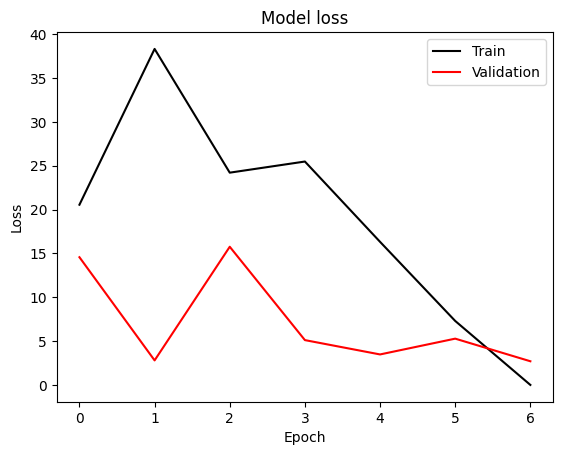

In [63]:
plt.subplot(1,1,1)
plt.plot(history.history['loss'],color= 'k')
plt.plot(history.history['val_loss'], color= 'r')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

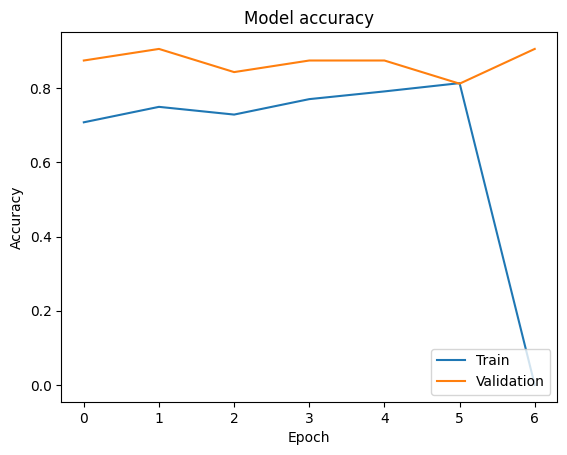

In [64]:
plt.subplot(1,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')



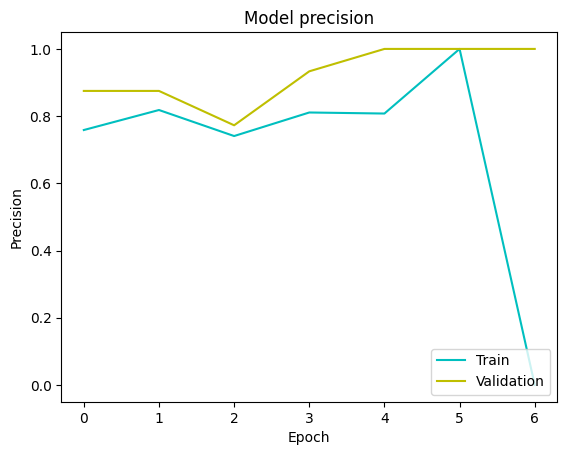

In [65]:
# Plotting the precision vs epoch
plt.subplot(1,1,1)
plt.plot(history.history['precision'], color='c')
plt.plot(history.history['val_precision'], color='y')
plt.title('Model precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')


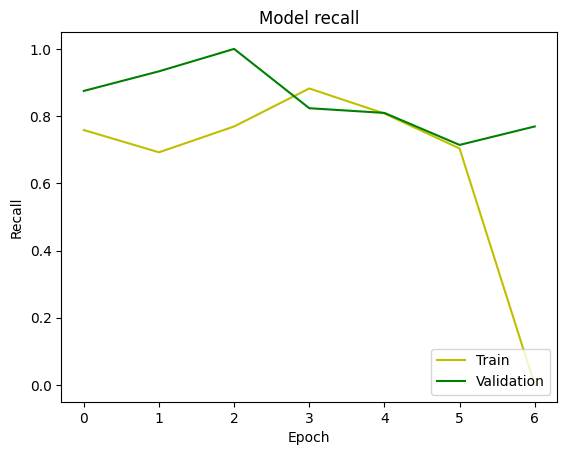

In [66]:
# Plotting the recall vs epoch
plt.subplot(1,1,1)
plt.plot(history.history['recall'], color='y')
plt.plot(history.history['val_recall'], color='g')
plt.title('Model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

Making prediction on single clip


In [67]:
X_test, y_test = test.as_numpy_iterator().next()

In [68]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 386ms/step


Convert Logits to Classes

In [69]:
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]

Building mp3 Parsing Functions

In [70]:
def load_mp3_16k_mono(filename):
    """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    res = tfio.audio.AudioIOTensor(filename)
    # Convert to tensor and combine channels 
    tensor = res.to_tensor()
    tensor = tf.math.reduce_sum(tensor, axis=1) / 2 
    # Extract sample rate and cast
    sample_rate = res.rate
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Resample to 16 kHz
    wav = tfio.audio.resample(tensor, rate_in=41000, rate_out=16000)
    return wav

In [71]:
mp3 = os.path.join('gdrive', 'MyDrive', 'speech_project', 'cat_dog', 'm1.mp3')

In [72]:
wav = load_mp3_16k_mono(mp3)

In [73]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)

In [74]:
samples, index = audio_slices.as_numpy_iterator().next()

Build Function to Convert Clips into Windowed Spectrograms

In [75]:
def preprocess_mp3(sample, index):
    sample = sample[0]
    zero_padding = tf.zeros([32000] - tf.shape(sample), dtype=tf.float32)
    wav = tf.concat([zero_padding, sample],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram

Convert Longer Clips into Windows and Make Predictions

In [76]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=32000, sequence_stride=32000, batch_size=1)
audio_slices = audio_slices.map(preprocess_mp3)
audio_slices = audio_slices.batch(64)

In [77]:
yhat = model.predict(audio_slices)
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]

3/3 [==============================] - 6s 780ms/step


Group Consecutive Detections

In [78]:
from itertools import groupby

In [79]:
yhat = [key for key, group in groupby(yhat)]
cats_meew = tf.math.reduce_sum(yhat).numpy()

In [80]:
cats_meew

31

Make Predictions

Loop over all recordings and make predictions

In [83]:
results = {}
for file in os.listdir(os.path.join('gdrive', 'MyDrive', 'speech_project', 'cat_dog')):
    FILEPATH = os.path.join('gdrive', 'MyDrive', 'speech_project', 'cat_dog', file)
    
    wav = load_mp3_16k_mono(FILEPATH)
    audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=32000, sequence_stride=32000, batch_size=1)
    audio_slices = audio_slices.map(preprocess_mp3)
    audio_slices = audio_slices.batch(64)
    
    yhat = model.predict(audio_slices)
    
    results[file] = yhat

5/5 [==============================] - 7s 1s/step


In [ ]:
yhat

Convert Predictions into Classes

In [ ]:
class_preds = {}
for file, logits in results.items():
    class_preds[file] = [1 if prediction > 0.9 else 0 for prediction in logits]
class_preds

Group Consecutive Detections

In [89]:
postprocessed = {}
for file, scores in class_preds.items():
    postprocessed[file] = tf.math.reduce_sum([key for key, group in groupby(scores)]).numpy()
postprocessed

{'m1.mp3': 30, 'm2.mp3': 44}